In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('test.csv')

# EDA

In [4]:
df_train.shape

(12906, 83)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [6]:
df_train.describe()

patient_id  patient_zip3   patient_age          bmi    population  \
count   12906.000000  12906.000000  12906.000000  3941.000000  12905.000000   
mean   547381.196033    573.754300     59.183326    28.984539  20744.441237   
std    260404.959974    275.447534     13.335216     5.696906  13886.903756   
min    100063.000000    101.000000     18.000000    14.000000    635.545455   
25%    321517.000000    331.000000     50.000000    24.660000   9463.896552   
50%    543522.000000    554.000000     59.000000    28.190000  19154.190480   
75%    772671.750000    846.000000     67.000000    32.920000  30021.278690   
max    999896.000000    999.000000     91.000000    85.000000  71374.131580   

            density    age_median  age_under_10  age_10_to_19       age_20s  \
count  12905.000000  12905.000000  12905.000000  12905.000000  12905.000000   
mean    1581.950419     40.502259     11.122784     12.945265     13.290376   
std     2966.305306      4.036963      1.512376      1.923974      3.354103   
min        0.916667     20.600000      0.000000      6.314286      5.925000   
25%      171.857143     37.129825     10.160000     11.741176     11.013415   
50%      700.337500     40.639344     11.039216     12.923944     12.538095   
75%     1666.515385     42.934783     12.190000     14.019767     14.971053   
max    21172.000000     54.570000     17.675000     35.300000     62.100000   

       ...      disabled       poverty  limited_english  commute_time  \
count  ...  12905.000000  12902.000000     12902.000000  12905.000000   
mean   ...     13.335299     13.406950         4.474956     27.978387   
std    ...      3.690949      5.222495         4.837085      5.083939   
min    ...      4.600000      3.433333         0.000000     12.460784   
25%    ...     10.270492      9.663333         0.994444     24.933333   
50%    ...     12.884000     12.177778         2.747222     27.788235   
75%    ...     15.555405     16.635556         5.976000     30.709375   
max    ...     35.155556     38.347826        26.755000     48.020000   

       health_uninsured       veteran         Ozone          PM25  \
count      12905.000000  12905.000000  12877.000000  12877.000000   
mean           8.575284      7.083376     39.822352      7.475221   
std            4.203482      3.109022      3.559492      1.516499   
min            2.440000      1.200000     30.939316      2.636008   
25%            5.618750      4.929688     37.698880      6.651215   
50%            7.465714      6.847059     39.108249      7.686577   
75%           10.617442      8.620000     41.136513      8.276922   
max           27.566102     25.200000     52.237210     11.169408   

                N02  DiagPeriodL90D  
count  12877.000000    12906.000000  
mean      16.098988        0.624516  
std        5.842501        0.484266  
min        2.760371        0.000000  
25%       11.280694        0.000000  
50%       15.589148        1.000000  
75%       20.801880        1.000000  
max       31.504775        1.000000  

[8 rows x 72 columns]

In [7]:
df_train.head()

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   

       Ozone      PM25        N02  DiagPeriodL90D  
0  52.237210  8.650555  18.606528               1  
1  42.301121  8.487175  20.113179               1  
2  40.108207  7.642753  14.839351               1  
3  42.070075  7.229393  15.894123               0  
4  41.356058  4.110749  11.722197               0  

[5 rows x 83 columns]

In [8]:
df_train.isnull()

patient_id  patient_race  payer_type  patient_state  patient_zip3  \
0           False          True       False          False         False   
1           False         False       False          False         False   
2           False         False       False          False         False   
3           False         False       False          False         False   
4           False          True       False          False         False   
...           ...           ...         ...            ...           ...   
12901       False         False        True          False         False   
12902       False          True       False          False         False   
12903       False          True       False          False         False   
12904       False          True        True          False         False   
12905       False         False       False          False         False   

       patient_age  patient_gender    bmi  breast_cancer_diagnosis_code  \
0            False           False   True                         False   
1            False           False  False                         False   
2            False           False  False                         False   
3            False           False   True                         False   
4            False           False   True                         False   
...            ...             ...    ...                           ...   
12901        False           False  False                         False   
12902        False           False   True                         False   
12903        False           False  False                         False   
12904        False           False  False                         False   
12905        False           False   True                         False   

       breast_cancer_diagnosis_desc  ...  disabled  poverty  limited_english  \
0                             False  ...     False    False            False   
1                             False  ...     False    False            False   
2                             False  ...     False    False            False   
3                             False  ...     False    False            False   
4                             False  ...     False    False            False   
...                             ...  ...       ...      ...              ...   
12901                         False  ...     False    False            False   
12902                         False  ...     False    False            False   
12903                         False  ...     False    False            False   
12904                         False  ...     False    False            False   
12905                         False  ...     False    False            False   

       commute_time  health_uninsured  veteran  Ozone   PM25    N02  \
0             False             False    False  False  False  False   
1             False             False    False  False  False  False   
2             False             False    False  False  False  False   
3             False             False    False  False  False  False   
4             False             False    False  False  False  False   
...             ...               ...      ...    ...    ...    ...   
12901         False             False    False  False  False  False   
12902         False             False    False  False  False  False   
12903         False             False    False  False  False  False   
12904         False             False    False  False  False  False   
12905         False             False    False  False  False  False   

       DiagPeriodL90D  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
12901           False  
12902           False  
12903           False  
12904           False  
12905           False  

[12906 rows x 83 columns]

In [9]:
df_train.isnull().sum().sort_values(ascending = False)

metastatic_first_novel_treatment_type    12882
metastatic_first_novel_treatment         12882
bmi                                       8965
patient_race                              6385
payer_type                                1803
                                         ...  
patient_zip3                                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
patient_id                                   0
DiagPeriodL90D                               0
Length: 83, dtype: int64

## Categorical Variables

In [11]:
# 1: The patient was dianosed within 90 days of screening
# 0: The patient was not diagnosed within 90 days of screening
df_train['DiagPeriodL90D'].value_counts()

DiagPeriodL90D
1    8060
0    4846
Name: count, dtype: int64

In [12]:
# Ratio
4846 / 8060

0.6012406947890819

In [13]:
df_train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [14]:
df_train['patient_race'].value_counts()

patient_race
White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: count, dtype: int64

In [15]:
df_train['patient_state'].nunique()

50

In [16]:
df_train['patient_state'].value_counts()

patient_state
CA    2438
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
NJ      21
HI      21
DC      20
SD       8
AK       6
ND       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: count, dtype: int64

In [17]:
df_train['patient_zip3'].nunique()

739

In [18]:
df_train['patient_age'].nunique()

67

In [19]:
df_train['patient_age'].value_counts()

patient_age
60    471
63    468
62    458
61    451
64    434
     ... 
18      8
23      6
19      5
20      4
21      3
Name: count, Length: 67, dtype: int64

In [20]:
df_train['breast_cancer_diagnosis_code'].nunique()

50

In [21]:
df_train['breast_cancer_diagnosis_code'].value_counts()

breast_cancer_diagnosis_code
1749      1982
C50911    1797
C50912    1712
C50919    1467
C50411     978
C50412     877
C50811     491
C50812     419
1744       389
1748       307
C50212     293
C50211     276
C50511     213
C50112     209
C50111     208
C50512     176
C50312     159
C50311     138
C50011     108
C50012     105
1742        98
1741        88
1745        71
C50819      54
C50419      48
C5091       37
1743        34
C50612      29
C50611      25
C50319      16
C50019      13
1746        12
C50219      11
C50119      11
C5041        9
19881        9
C5081        8
C50519       8
C509         3
C50619       3
C50929       3
C5021        3
C5011        2
C5051        1
C50021       1
C5031        1
C50          1
1759         1
C5001        1
C50421       1
Name: count, dtype: int64

In [22]:
df_train['breast_cancer_diagnosis_desc'].nunique()

50

In [23]:
df_train['metastatic_cancer_diagnosis_code'].nunique()

43

In [24]:
df_train['metastatic_first_novel_treatment'].value_counts()

metastatic_first_novel_treatment
PEMBROLIZUMAB    13
OLAPARIB         11
Name: count, dtype: int64

In [25]:
df_train['metastatic_first_novel_treatment_type'].value_counts()

metastatic_first_novel_treatment_type
Antineoplastics    24
Name: count, dtype: int64

In [26]:
df_train['payer_type'].value_counts()

payer_type
COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: count, dtype: int64

In [27]:
df_train['Region'].value_counts()

Region
South        3919
West         3735
Midwest      3650
Northeast    1550
Name: count, dtype: int64

In [28]:
df_train['Division'].value_counts()

Division
East North Central    2923
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
New England              5
Name: count, dtype: int64

## Data Visualization of Numerical Variables

### Box Plots and Histograms

In [31]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = 'pink'
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = 'winter'
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = 'blue', linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = 'red', linestyle = "-"
    )  # Add median to the histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


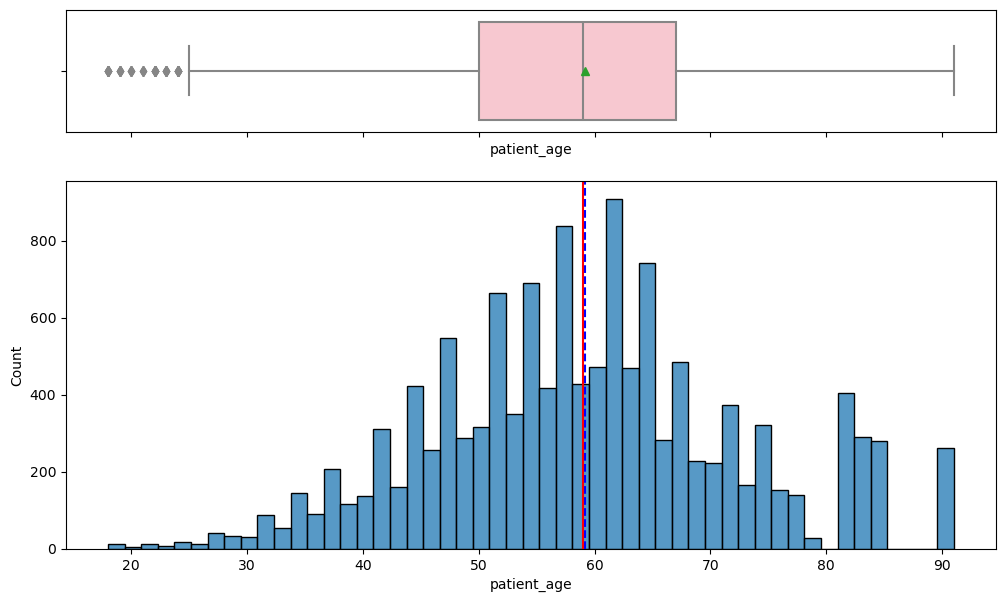

In [32]:
histogram_boxplot(df_train, 'patient_age')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


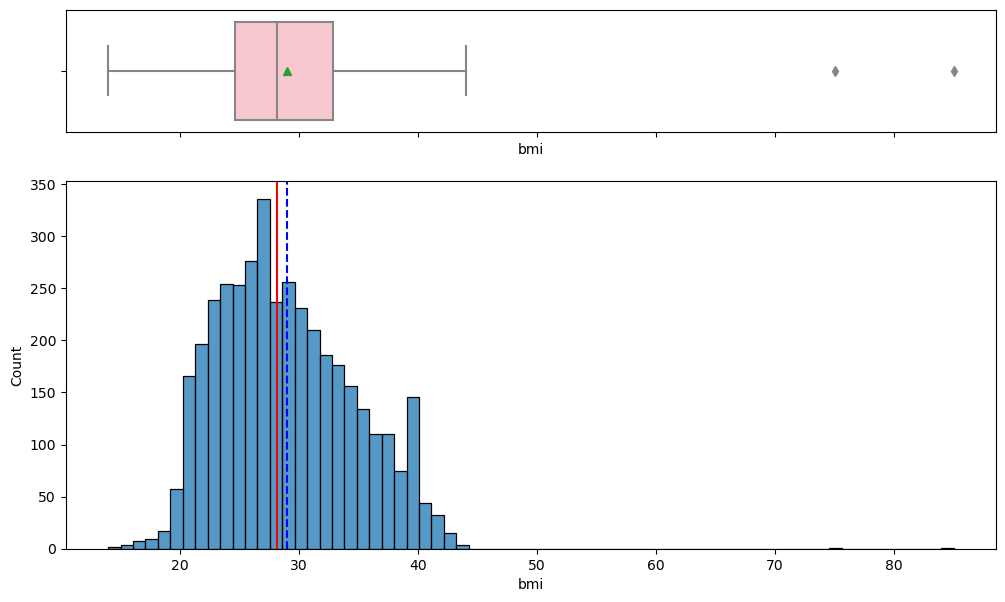

In [33]:
histogram_boxplot(df_train, 'bmi')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


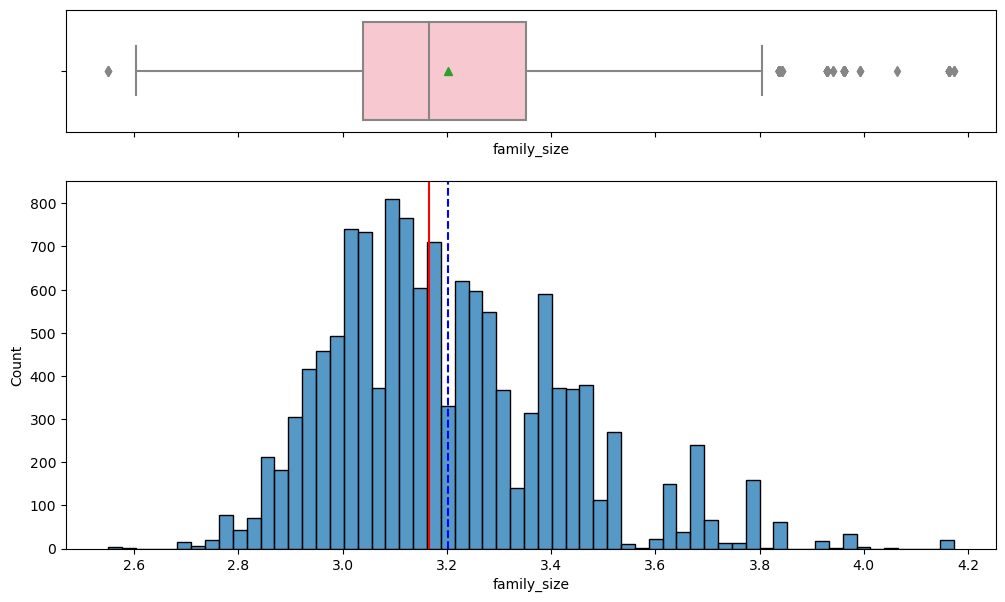

In [34]:
histogram_boxplot(df_train, 'family_size')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


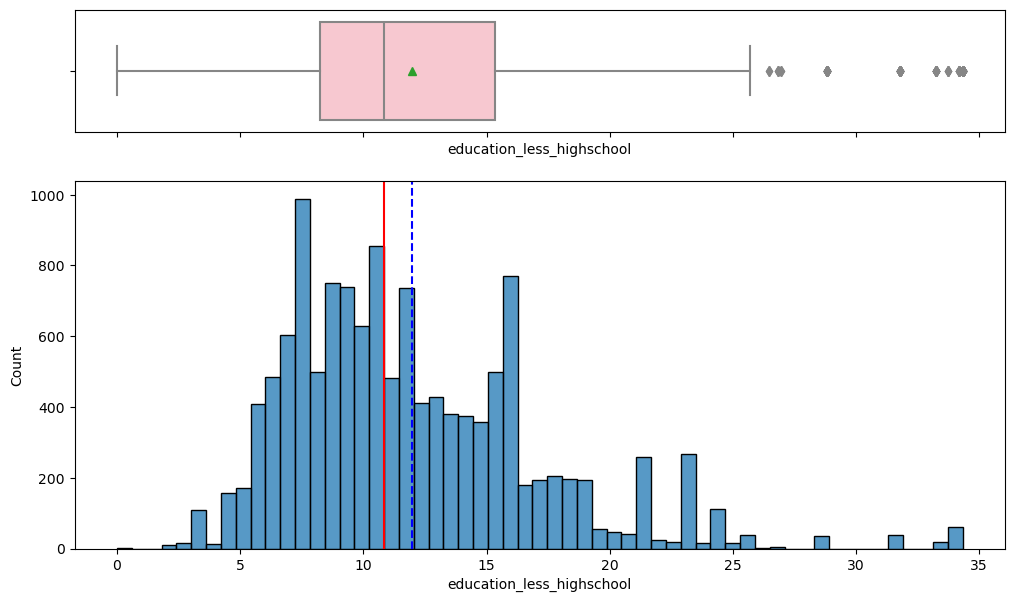

In [35]:
histogram_boxplot(df_train, 'education_less_highschool')

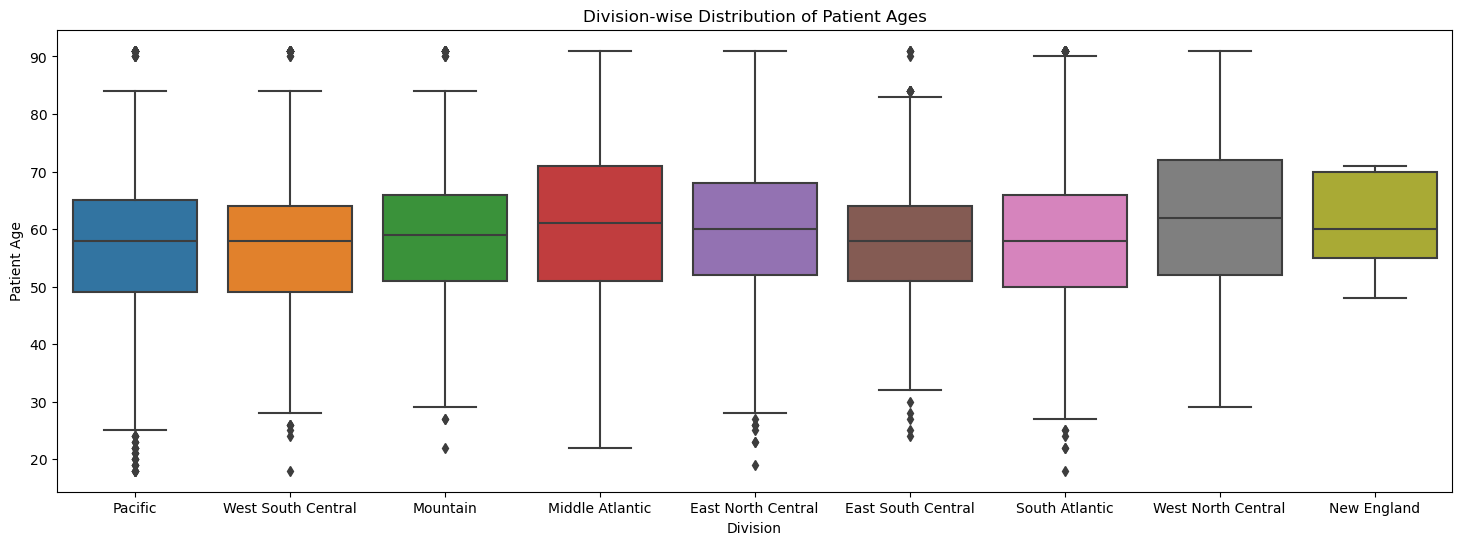

In [67]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='Division', y='patient_age', data=df_train)
plt.title('Division-wise Distribution of Patient Ages')
plt.xlabel('Division')
plt.ylabel('Patient Age')
plt.show()

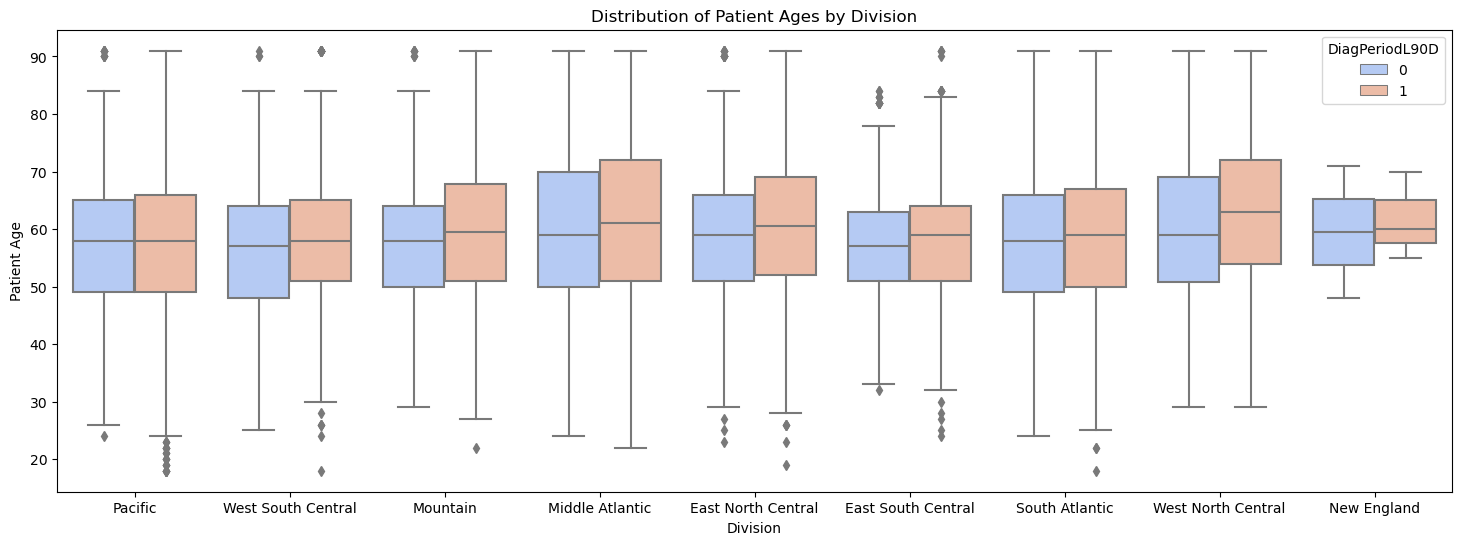

In [103]:
plt.figure(figsize=(18, 6))
sns.boxplot(x = 'Division', y = 'patient_age', hue='DiagPeriodL90D', palette='coolwarm', data=df_train)
plt.title('Distribution of Patient Ages by Division')
plt.xlabel('Division')
plt.ylabel('Patient Age')
plt.show()

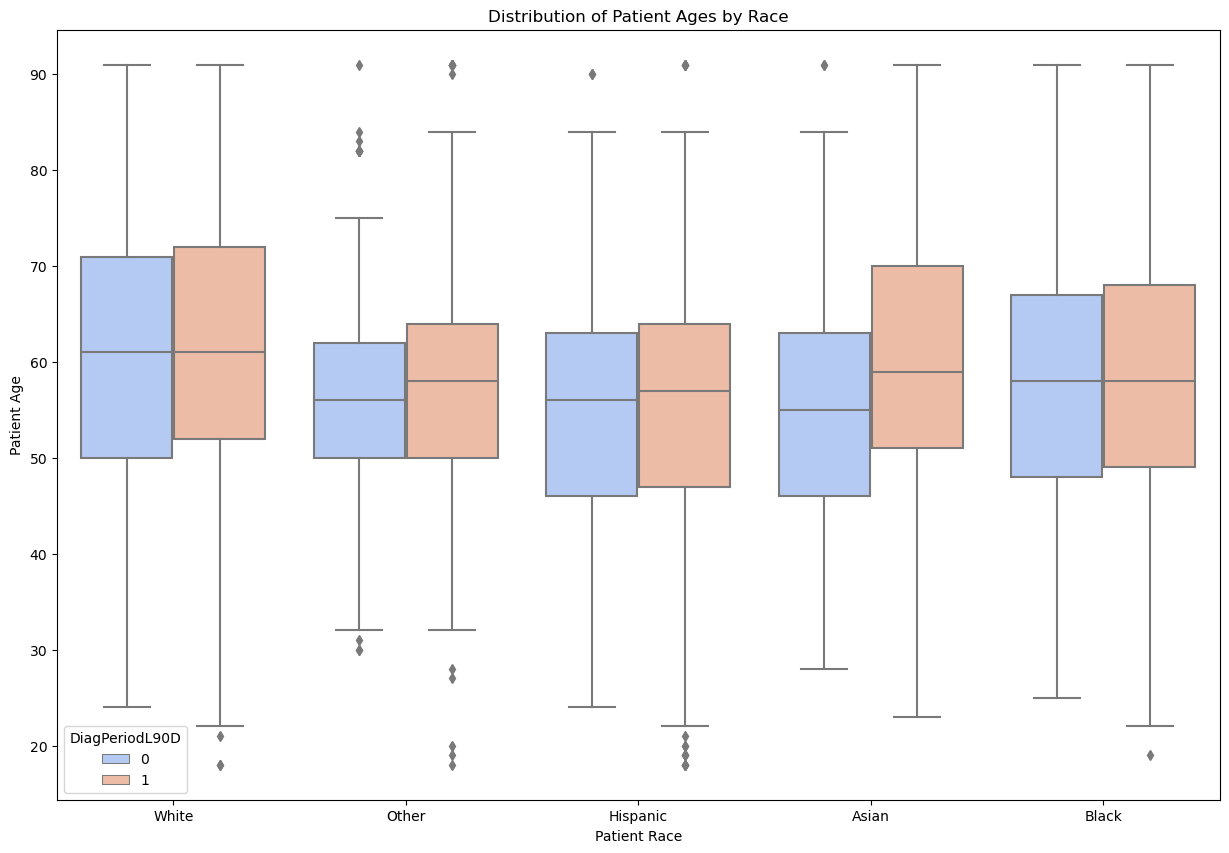

In [105]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'patient_race', y = 'patient_age', hue='DiagPeriodL90D', palette='coolwarm', data=df_train)
plt.title('Distribution of Patient Ages by Race')
plt.xlabel('Patient Race')
plt.ylabel('Patient Age')
plt.show()

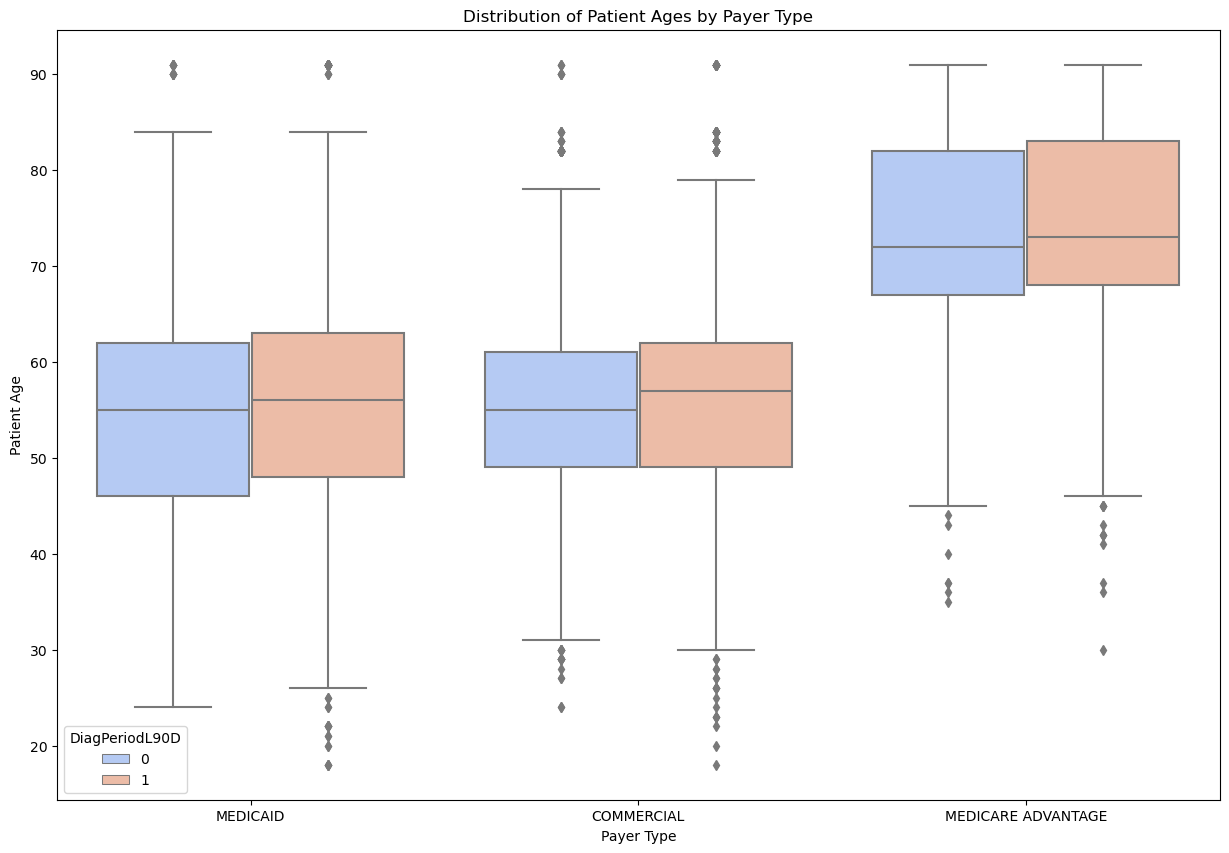

In [107]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'payer_type', y = 'patient_age', hue='DiagPeriodL90D', palette='coolwarm', data=df_train)
plt.title('Distribution of Patient Ages by Payer Type')
plt.xlabel('Payer Type')
plt.ylabel('Patient Age')
plt.show()

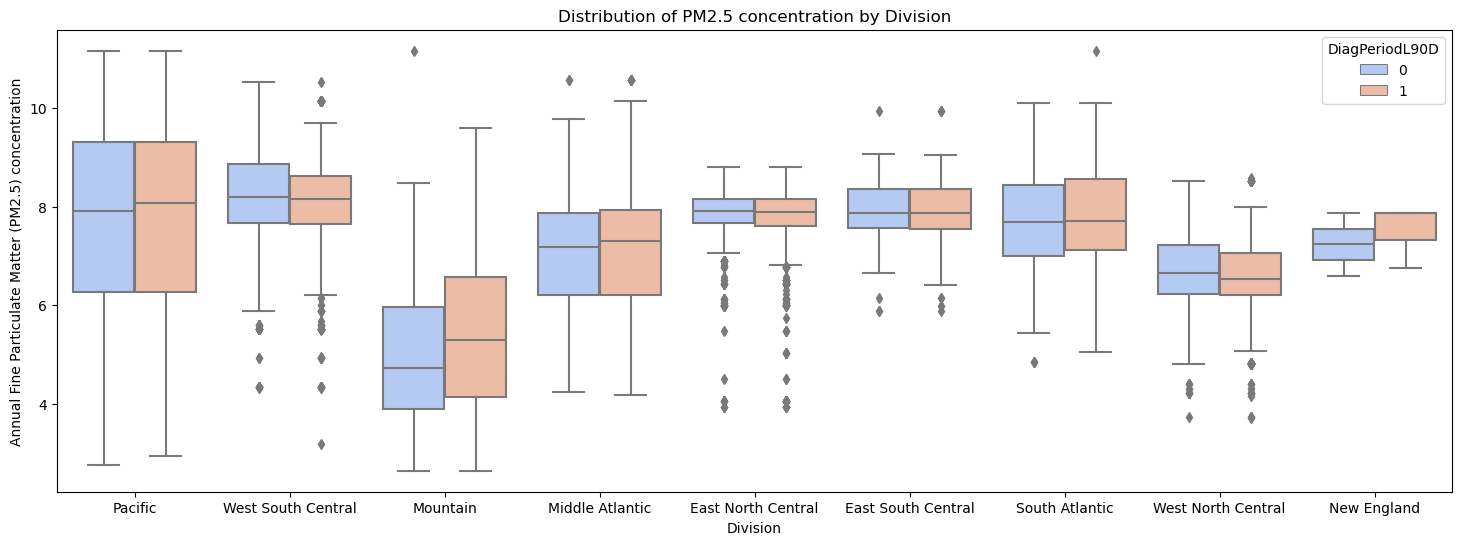

In [109]:
plt.figure(figsize=(18, 6))
sns.boxplot(x = 'Division', y = 'PM25', hue='DiagPeriodL90D', palette='coolwarm', data=df_train)
plt.title('Distribution of PM2.5 concentration by Division')
plt.xlabel('Division')
plt.ylabel('Annual Fine Particulate Matter (PM2.5) concentration')
plt.show()

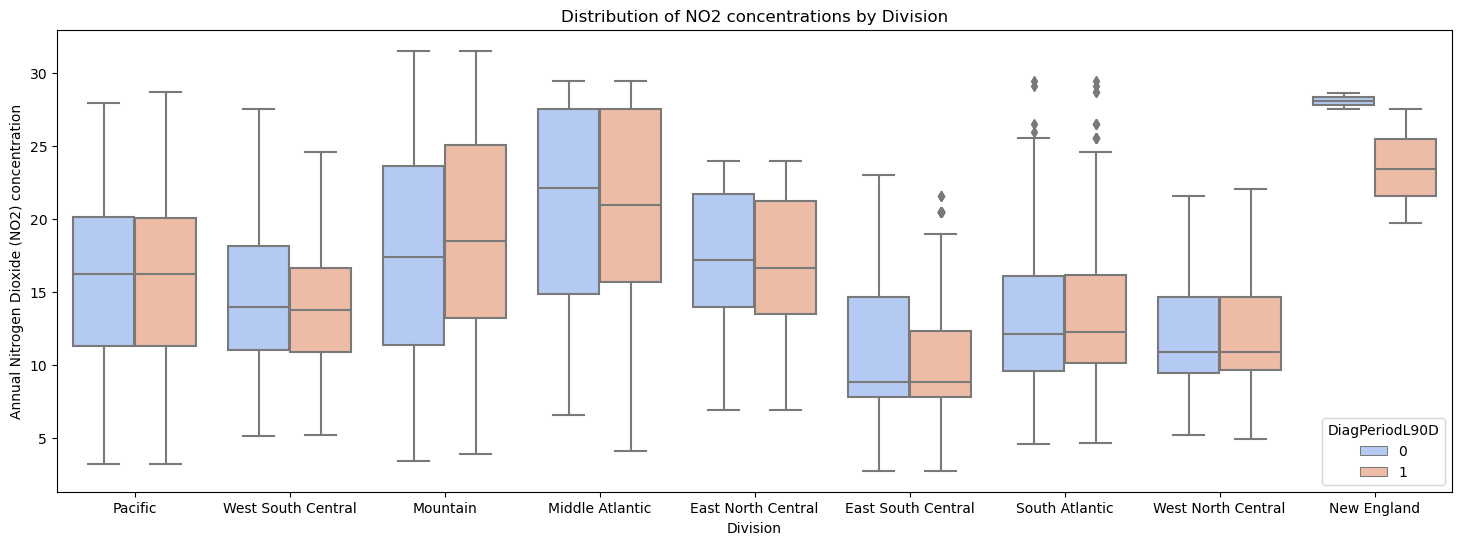

In [111]:
plt.figure(figsize=(18, 6))
sns.boxplot(x = 'Division', y = 'N02', hue='DiagPeriodL90D', palette='coolwarm', data=df_train)
plt.title('Distribution of NO2 concentrations by Division')
plt.xlabel('Division')
plt.ylabel('Annual Nitrogen Dioxide (NO2) concentration')
plt.show()

## Take aways

In [116]:
df_train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

The columns I will be keeping are: 'patient_age', 'unemployment_rate', 'rent_burden', 'poverty', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02'

## Data Cleaning

In [122]:
df_train_select = df_train[['patient_age', 'unemployment_rate', 'rent_burden', 'poverty', 'health_uninsured', 'veteran', 'Ozone', 'PM25',
                           'N02', 'DiagPeriodL90D']]

In [124]:
df_train_select.head()

patient_age  unemployment_rate  rent_burden    poverty  health_uninsured  \
0           84           8.471429    37.442857  22.542857         11.200000   
1           62           5.103030    34.753125  10.109091          7.018182   
2           43           4.560000    29.358491   9.663333         15.066667   
3           45           5.264286    32.030952   8.688095          4.404762   
4           55           4.258000    27.029730  11.224000         12.088000   

     veteran      Ozone      PM25        N02  DiagPeriodL90D  
0   3.500000  52.237210  8.650555  18.606528               1  
1   4.103030  42.301121  8.487175  20.113179               1  
2   7.446667  40.108207  7.642753  14.839351               1  
3   4.809524  42.070075  7.229393  15.894123               0  
4  13.106000  41.356058  4.110749  11.722197               0

In [126]:
df_train_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_age        12906 non-null  int64  
 1   unemployment_rate  12905 non-null  float64
 2   rent_burden        12902 non-null  float64
 3   poverty            12902 non-null  float64
 4   health_uninsured   12905 non-null  float64
 5   veteran            12905 non-null  float64
 6   Ozone              12877 non-null  float64
 7   PM25               12877 non-null  float64
 8   N02                12877 non-null  float64
 9   DiagPeriodL90D     12906 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1008.4 KB


In [128]:
df_train_select = df_train_select.dropna()

In [130]:
df_train_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12873 entries, 0 to 12905
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_age        12873 non-null  int64  
 1   unemployment_rate  12873 non-null  float64
 2   rent_burden        12873 non-null  float64
 3   poverty            12873 non-null  float64
 4   health_uninsured   12873 non-null  float64
 5   veteran            12873 non-null  float64
 6   Ozone              12873 non-null  float64
 7   PM25               12873 non-null  float64
 8   N02                12873 non-null  float64
 9   DiagPeriodL90D     12873 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1.1 MB


In [132]:
df_train_select.corr()

patient_age  unemployment_rate  rent_burden   poverty  \
patient_age           1.000000          -0.007340    -0.012751 -0.000002   
unemployment_rate    -0.007340           1.000000     0.496329  0.688834   
rent_burden          -0.012751           0.496329     1.000000  0.385720   
poverty              -0.000002           0.688834     0.385720  1.000000   
health_uninsured     -0.036357           0.057771     0.066615  0.357324   
veteran               0.003512          -0.207293    -0.276063 -0.097412   
Ozone                -0.026102           0.137112     0.113993  0.010937   
PM25                 -0.022805           0.210523     0.181175  0.199358   
N02                   0.014921           0.215532     0.304396  0.002561   
DiagPeriodL90D        0.054773          -0.020226     0.000935 -0.024926   

                   health_uninsured   veteran     Ozone      PM25       N02  \
patient_age               -0.036357  0.003512 -0.026102 -0.022805  0.014921   
unemployment_rate          0.057771 -0.207293  0.137112  0.210523  0.215532   
rent_burden                0.066615 -0.276063  0.113993  0.181175  0.304396   
poverty                    0.357324 -0.097412  0.010937  0.199358  0.002561   
health_uninsured           1.000000  0.084910 -0.029538  0.223320 -0.173913   
veteran                    0.084910  1.000000  0.121905 -0.407840 -0.479643   
Ozone                     -0.029538  0.121905  1.000000 -0.136418  0.056002   
PM25                       0.223320 -0.407840 -0.136418  1.000000  0.284709   
N02                       -0.173913 -0.479643  0.056002  0.284709  1.000000   
DiagPeriodL90D            -0.028382 -0.000735  0.007609 -0.016147  0.000923   

                   DiagPeriodL90D  
patient_age              0.054773  
unemployment_rate       -0.020226  
rent_burden              0.000935  
poverty                 -0.024926  
health_uninsured        -0.028382  
veteran                 -0.000735  
Ozone                    0.007609  
PM25                    -0.016147  
N02                      0.000923  
DiagPeriodL90D           1.000000

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

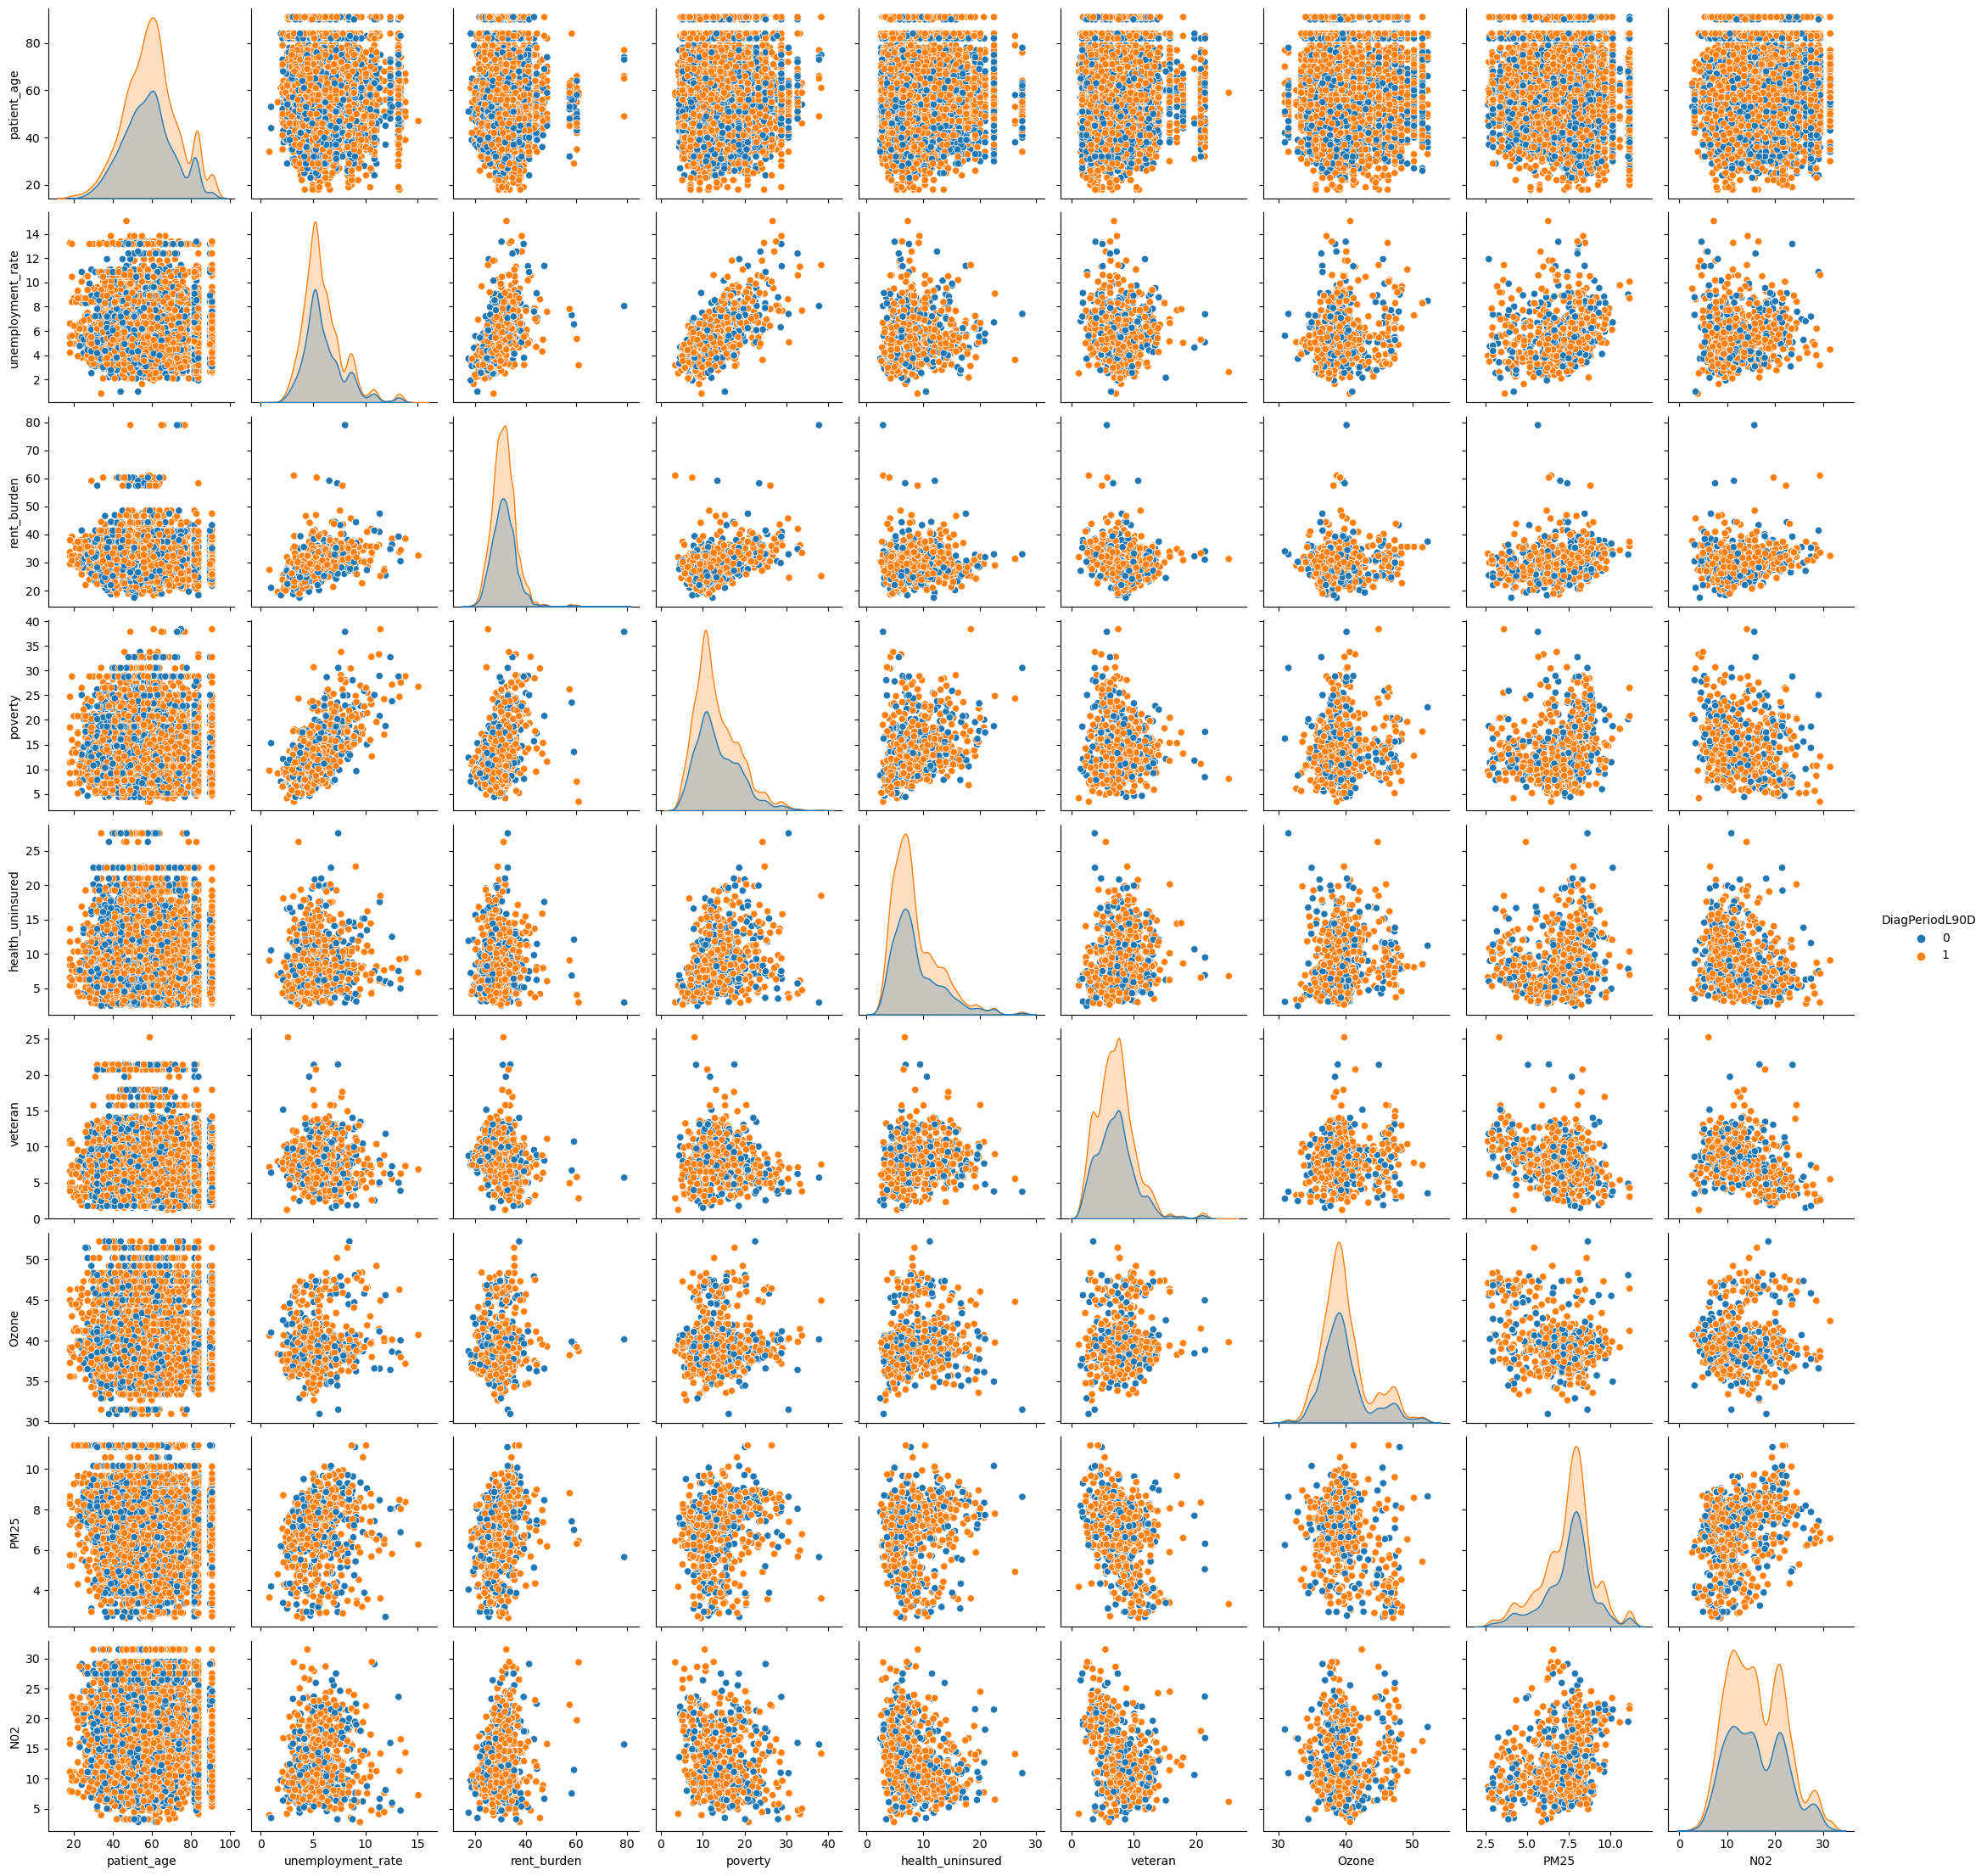

In [134]:
sns.pairplot(df_train_select, hue = 'DiagPeriodL90D')
plt.show()